a benchmark test in my laptop

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               142
Model name:          Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz


In [1]:
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
from pystem.stemsegmentation import segmentationSTEM

In [3]:
image = np.load('noisy_Cu_boundary.npy')

In [21]:
step = 10

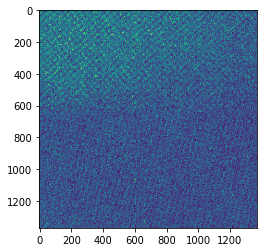

In [10]:
plt.imshow(image)

In [26]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=2,
                       window_x=30,window_y=30,
                       patch_x=30,patch_y=30,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   4.42[s]


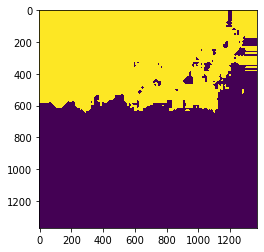

In [27]:
plt.imshow(labels)

In [28]:
descriptor_name = 'power_spectrum'
seg = segmentationSTEM( n_patterns=2,
                       window_x=30,window_y=30,
                       step=step,
                       descriptor_name=descriptor_name,
                       power_spectrum_logarithm=False,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   5.67[s]


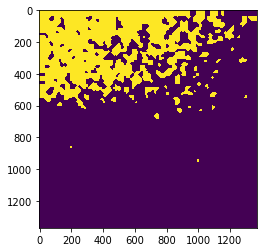

In [29]:
plt.imshow(labels)

In [30]:
descriptor_name = 'reflection_symmetry_maximums'
seg = segmentationSTEM(n_patterns=2,
                       window_x=30,window_y=30,
                       radius=30,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  64.62[s]


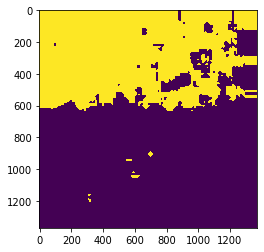

In [31]:
plt.imshow(labels)

In [32]:
descriptor_name = 'rotational_symmetry_maximums'
seg = segmentationSTEM( n_patterns=2,   #       rotational symmetry can only differentiate the grain boundary and the matrix
                       window_x=30,window_y=30,
                       radius=30,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  55.10[s]


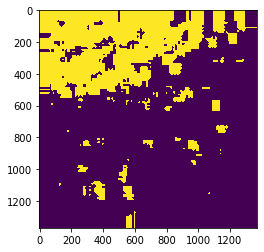

In [33]:
plt.imshow(labels)